# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [1138]:
print("""
      1. Воспроизводимость - создание одинаковых случайных результатов при выполнении.
      2. Для возможности сравнения результатов разных моделей и методов.
      """)


      1. Воспроизводимость - создание одинаковых случайных результатов при выполнении.
      2. Для возможности сравнения результатов разных моделей и методов.
      


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [1139]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [1140]:
print(df_train.sample(n=10))

                                        name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   

(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [1141]:
print(df_test.head(5))
print(df_test.tail(5))


                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 b

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [1142]:
# your code here
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [1143]:
df_train.describe(include='object')


,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [1144]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [1145]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>
> Есть пропуски в колонках mileage, engine, max_power, torque, seats.

In [1146]:
df_train.columns[df_train.isnull().any()].tolist()

['mileage', 'engine', 'max_power', 'torque', 'seats']

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?
> 1159

In [1147]:
len(df_train[df_train.drop(columns='selling_price').duplicated()])


1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [1148]:
df_train[df_train.drop(columns='selling_price').duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [1149]:
# Удаление повторяющихся строк, оставляя первую строку для каждого автомобиля при одинаковом признаковом описании
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']))

print(df_train)

                                   name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
6992            Hyundai Santro Xing GLS  2008         120000     191000   
6993  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
6994                  Hyundai i20 Magna  2013         320000     110000   
6995              Hyundai Verna CRDi SX  2007         135000     119000   
6996             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual

In [1150]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [1151]:
df_train.reset_index(drop = True , inplace = True )

In [1152]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [1153]:
# Убираем единицы измерения и приводим к float in train ds

df_train['mileage'] = df_train['mileage'].fillna(0.0)
df_train['mileage'] = df_train['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

df_train['engine'] = df_train['engine'].str.replace(' CC', '').astype(float)

df_train['max_power'] = df_train['max_power'].str.replace(' bhp', '')
df_train['max_power'] = pd.to_numeric(df_train['max_power']).astype(float)


In [1154]:
# доп балл

df_train['torque'] = df_train['torque'].astype(str)  
df_train['max_torque_rpm'] = ''

for index, row in df_train.iterrows():
    if 'at' in row['torque']:
        values = row['torque'].lower()
        values = values.split('at')        
    else:
        values = row['torque'].lower()
        values = values.split('@')

    if len(values) == 1:
        torque = values[0].strip().replace('nm', '').replace('kgm', '')
        df_train.at[index, 'torque'] = pd.to_numeric(torque, errors='coerce')
        df_train.at[index, 'max_torque_rpm'] = pd.to_numeric(0, errors='coerce')
    if len(values) == 2:
        try:
            torque = values[0].strip().replace('nm', '').replace('kgm', '')
            df_train.at[index, 'torque'] = pd.to_numeric(torque, errors='coerce')
            max_torque_rpm = values[1].strip().replace('rpm', '').replace(',', '')
            if '-' in max_torque_rpm:
                max_torque_rpm = max_torque_rpm.split('-')[1]
            df_train.at[index, 'max_torque_rpm'] = pd.to_numeric(max_torque_rpm, errors='coerce')
        except Exception as e:
            print(values, len(values), e)
    
    if len(values) > 2:       
        torque = values[0].strip().replace('nm', '').replace('kgm', '')
        df_train.at[index, 'torque'] = pd.to_numeric(torque, errors='coerce')
                
        max_torque_rpm = values[1].strip().replace('(kgm', "").replace('rpm', '').replace(',', '')
        if '-' in max_torque_rpm:
                max_torque_rpm = max_torque_rpm.split('-')[1]
        df_train.at[index, 'max_torque_rpm'] = pd.to_numeric(max_torque_rpm, errors='coerce')

In [1155]:
#df_train.to_excel('check.xlsx', index=False)

In [1156]:
# Убираем единицы измерения и приводим к float in test ds

df_test['mileage'] = df_test['mileage'].fillna(0.0)
df_test['mileage'] = df_test['mileage'].str.replace(' kmpl', '').str.replace(' km/kg', '').astype(float)

df_test['engine'] = df_test['engine'].str.replace(' CC', '').astype(float)

df_test['max_power'] = df_test['max_power'].str.replace(' bhp', '')
df_test['max_power'] = pd.to_numeric(df_test['max_power']).astype(float)

In [1157]:
# доп балл

df_test['torque'] = df_test['torque'].astype(str)  
df_test['max_torque_rpm'] = ''

for index, row in df_test.iterrows():
    if 'at' in row['torque']:
        values = row['torque'].lower()
        values = values.split('at')        
    else:
        values = row['torque'].lower()
        values = values.split('@')

    if len(values) == 1:
        torque = values[0].strip().replace('nm', '').replace('kgm', '')
        df_test.at[index, 'torque'] = pd.to_numeric(torque, errors='coerce')
        df_test.at[index, 'max_torque_rpm'] = pd.to_numeric(0, errors='coerce')
    if len(values) == 2:
        try:
            torque = values[0].strip().replace('nm', '').replace('kgm', '')
            df_test.at[index, 'torque'] = pd.to_numeric(torque, errors='coerce')
            max_torque_rpm = values[1].strip().replace('rpm', '').replace(',', '')
            if '-' in max_torque_rpm:
                max_torque_rpm = max_torque_rpm.split('-')[1]
            df_test.at[index, 'max_torque_rpm'] = pd.to_numeric(max_torque_rpm, errors='coerce')
        except Exception as e:
            print(values, len(values), e)
    
    if len(values) > 2:       
        torque = values[0].strip().replace('nm', '').replace('kgm', '')
        df_test.at[index, 'torque'] = pd.to_numeric(torque, errors='coerce')
                
        max_torque_rpm = values[1].strip().replace('(kgm', "").replace('rpm', '').replace(',', '')
        if '-' in max_torque_rpm:
                max_torque_rpm = max_torque_rpm.split('-')[1]
        df_test.at[index, 'max_torque_rpm'] = pd.to_numeric(max_torque_rpm, errors='coerce')

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [1158]:
df_train['mileage']=df_train['mileage'].fillna(df_train['mileage'].median())
df_train['engine']=df_train['engine'].fillna(df_train['engine'].median())
df_train['max_power']=df_train['max_power'].fillna(df_train['max_power'].median())
df_train['seats']=df_train['seats'].fillna(df_train['seats'].median())
df_train['torque']=df_train['torque'].fillna(df_train['torque'].median())
df_train['max_torque_rpm']=df_train['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())

In [1159]:
df_train.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64

In [1160]:
df_test['mileage']=df_test['mileage'].fillna(df_train['mileage'].median())
df_test['engine']=df_test['engine'].fillna(df_train['engine'].median())
df_test['max_power']=df_test['max_power'].fillna(df_train['max_power'].median())
df_test['seats']=df_test['seats'].fillna(df_train['seats'].median())
df_test['torque']=df_test['torque'].fillna(df_train['torque'].median())
df_test['max_torque_rpm']=df_test['max_torque_rpm'].fillna(df_train['max_torque_rpm'].median())

In [1161]:
df_test.isnull().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [1162]:
print("""
1. Количество сидений ограничено некоторым набором значений,
например 2, 4, 5, 7 и т.д. Эти значения фактически представляют разные категории или классы,
а не непрерывный диапазон значений.
2. Уникальные значения: Количество сидений может иметь уникальные значения, 
которые не могут быть сравнены или измерены с помощью обычных числовых операций. 
Например, нельзя сказать, что 5 сидений в два раза больше, чем 2 сиденья. Они представляют разные категории.
""")


1. Количество сидений ограничено некоторым набором значений,
например 2, 4, 5, 7 и т.д. Эти значения фактически представляют разные категории или классы,
а не непрерывный диапазон значений.
2. Уникальные значения: Количество сидений может иметь уникальные значения, 
которые не могут быть сравнены или измерены с помощью обычных числовых операций. 
Например, нельзя сказать, что 5 сидений в два раза больше, чем 2 сиденья. Они представляют разные категории.



In [1163]:
df_train=df_train.astype({'engine':int,'seats':int})
df_test=df_test.astype({'engine':int,'seats':int})

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

/home/roman/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


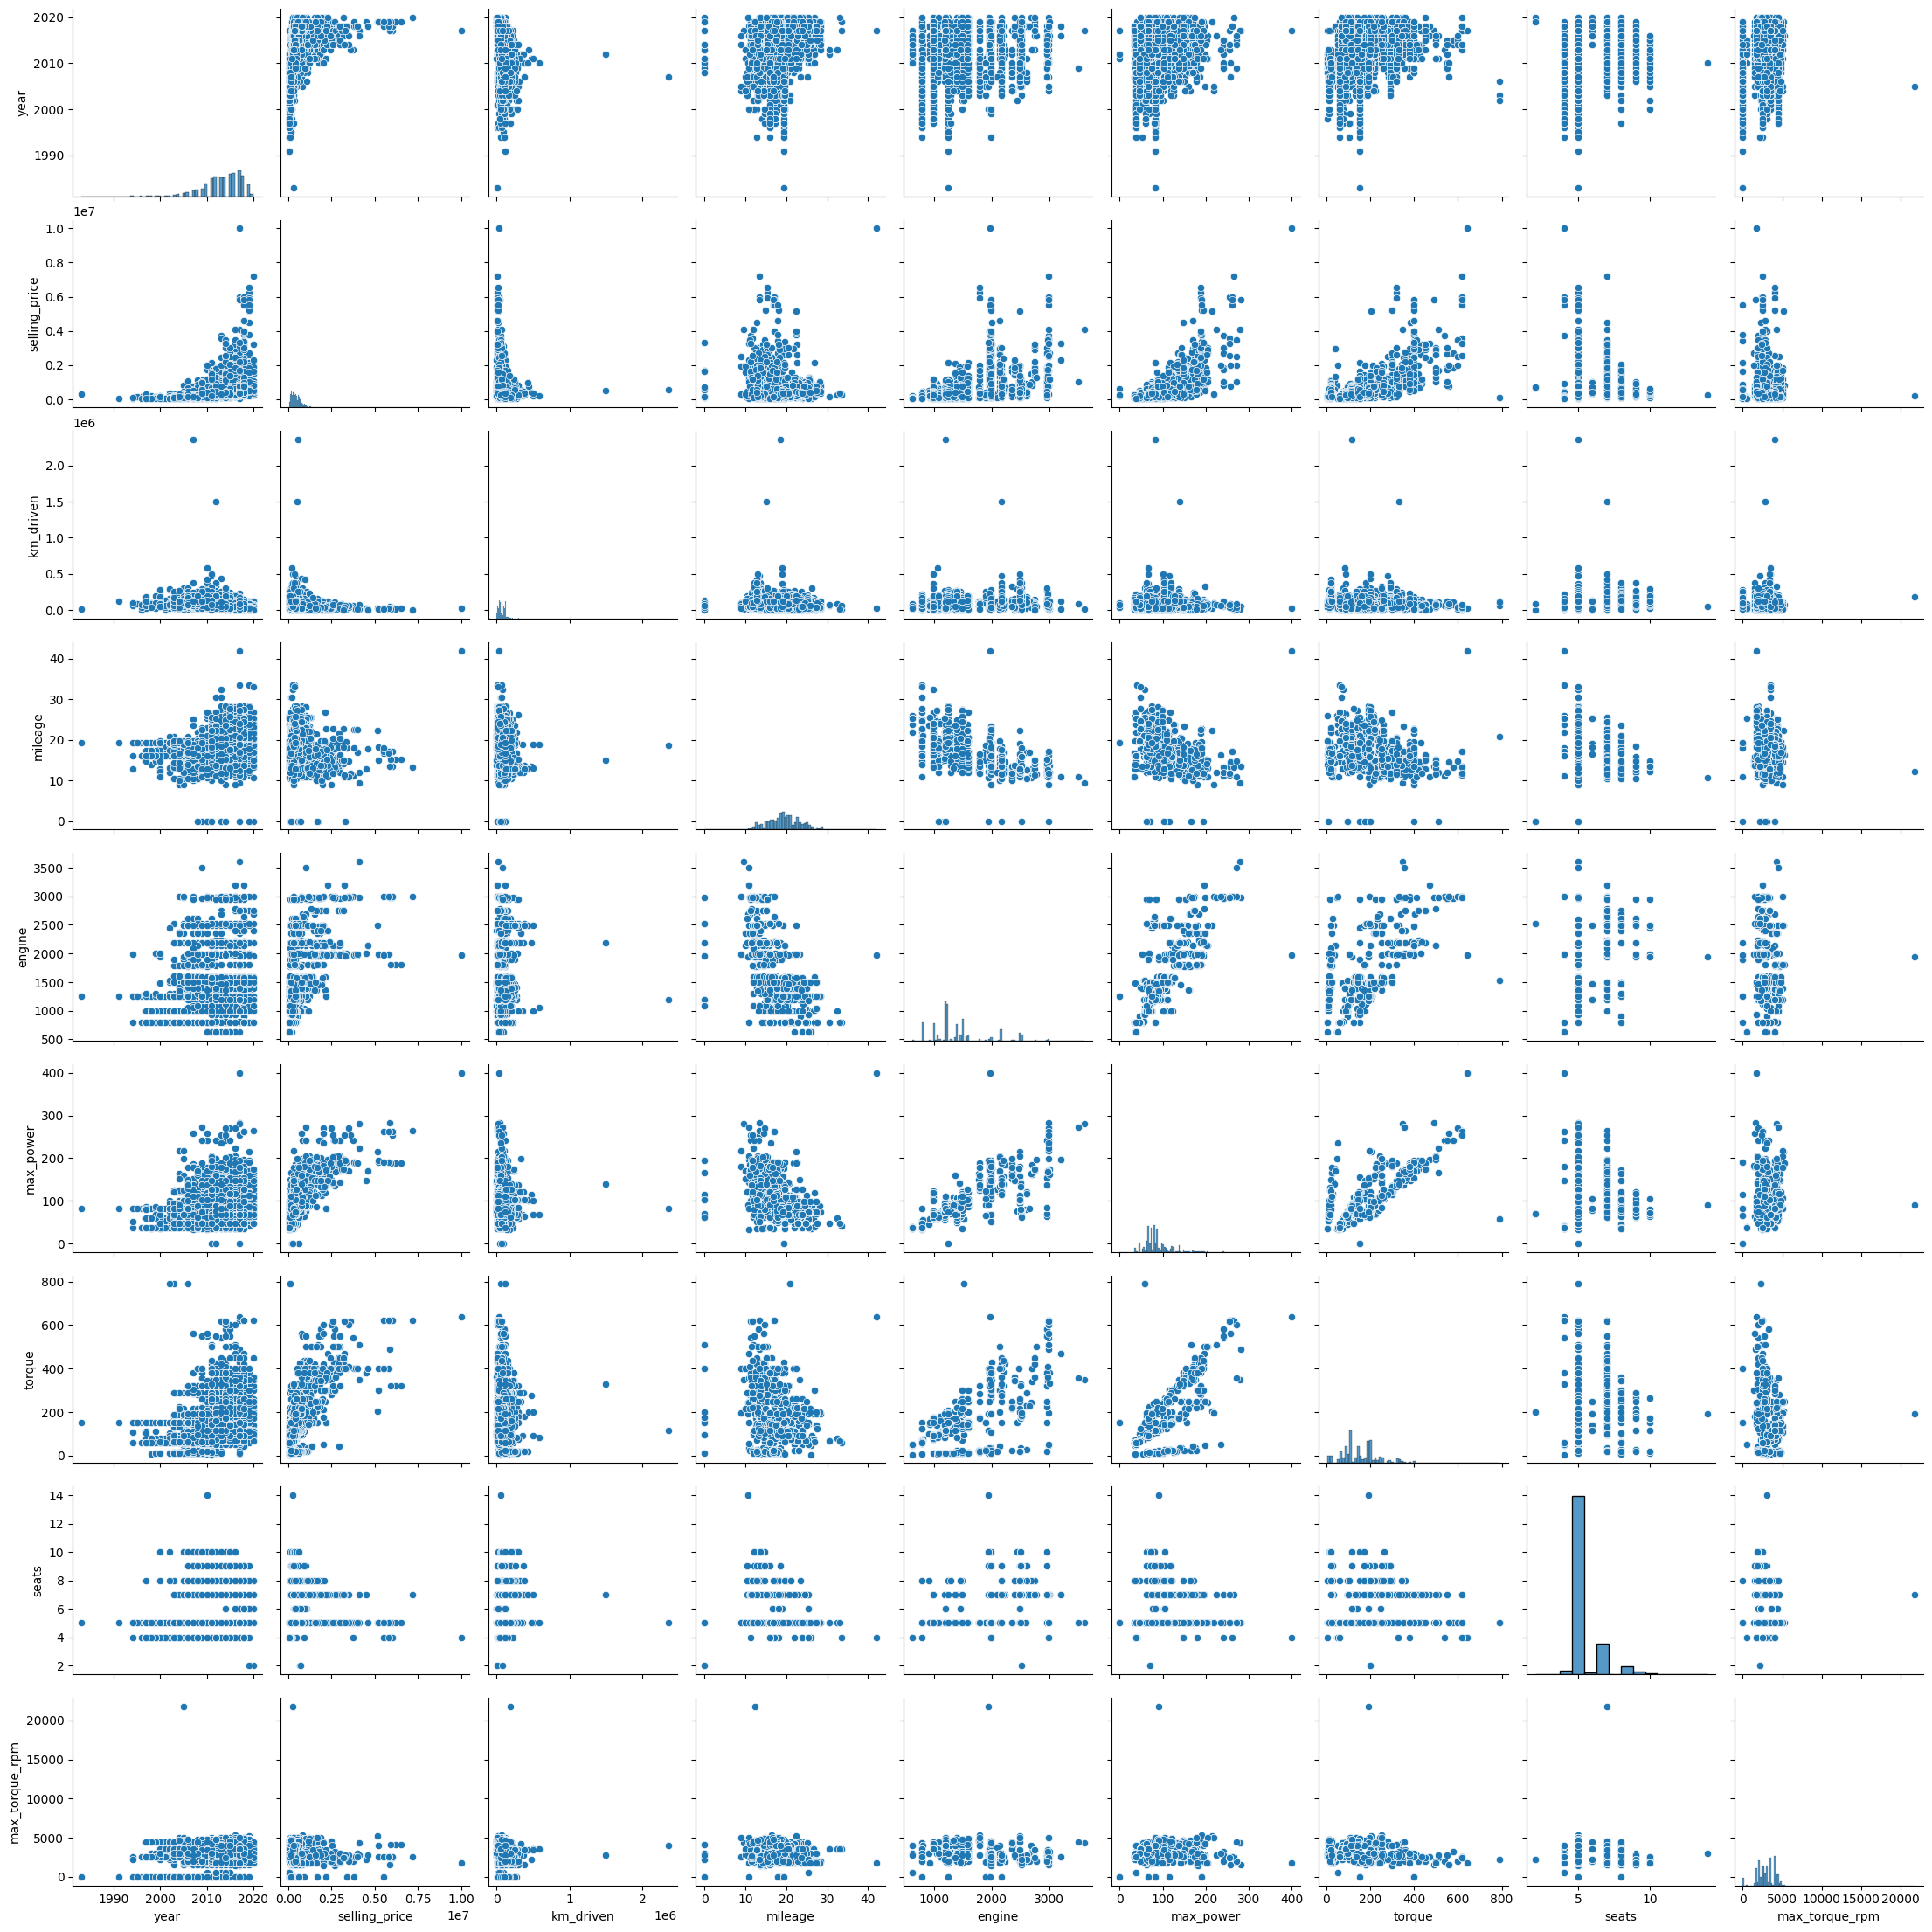

In [1164]:
sns.pairplot(df_train.drop(columns=['name','fuel','seller_type','transmission', 'owner']))
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

> Есть прямые зависимости между ценой автомобиля и его возврастом, объемом двигателя и мощностью двигателя.
И обратные с пробегом и количеством мест.
В целом значения рапределены нормально, если "логические" корреляции вроде мощности и объемом двигателя.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>
> В целом да, если говорить про целевую переменную. В других парах иногда прослеживаются более яркие закономерности, как пример пара "крутящий момент - двигатель".

/home/roman/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


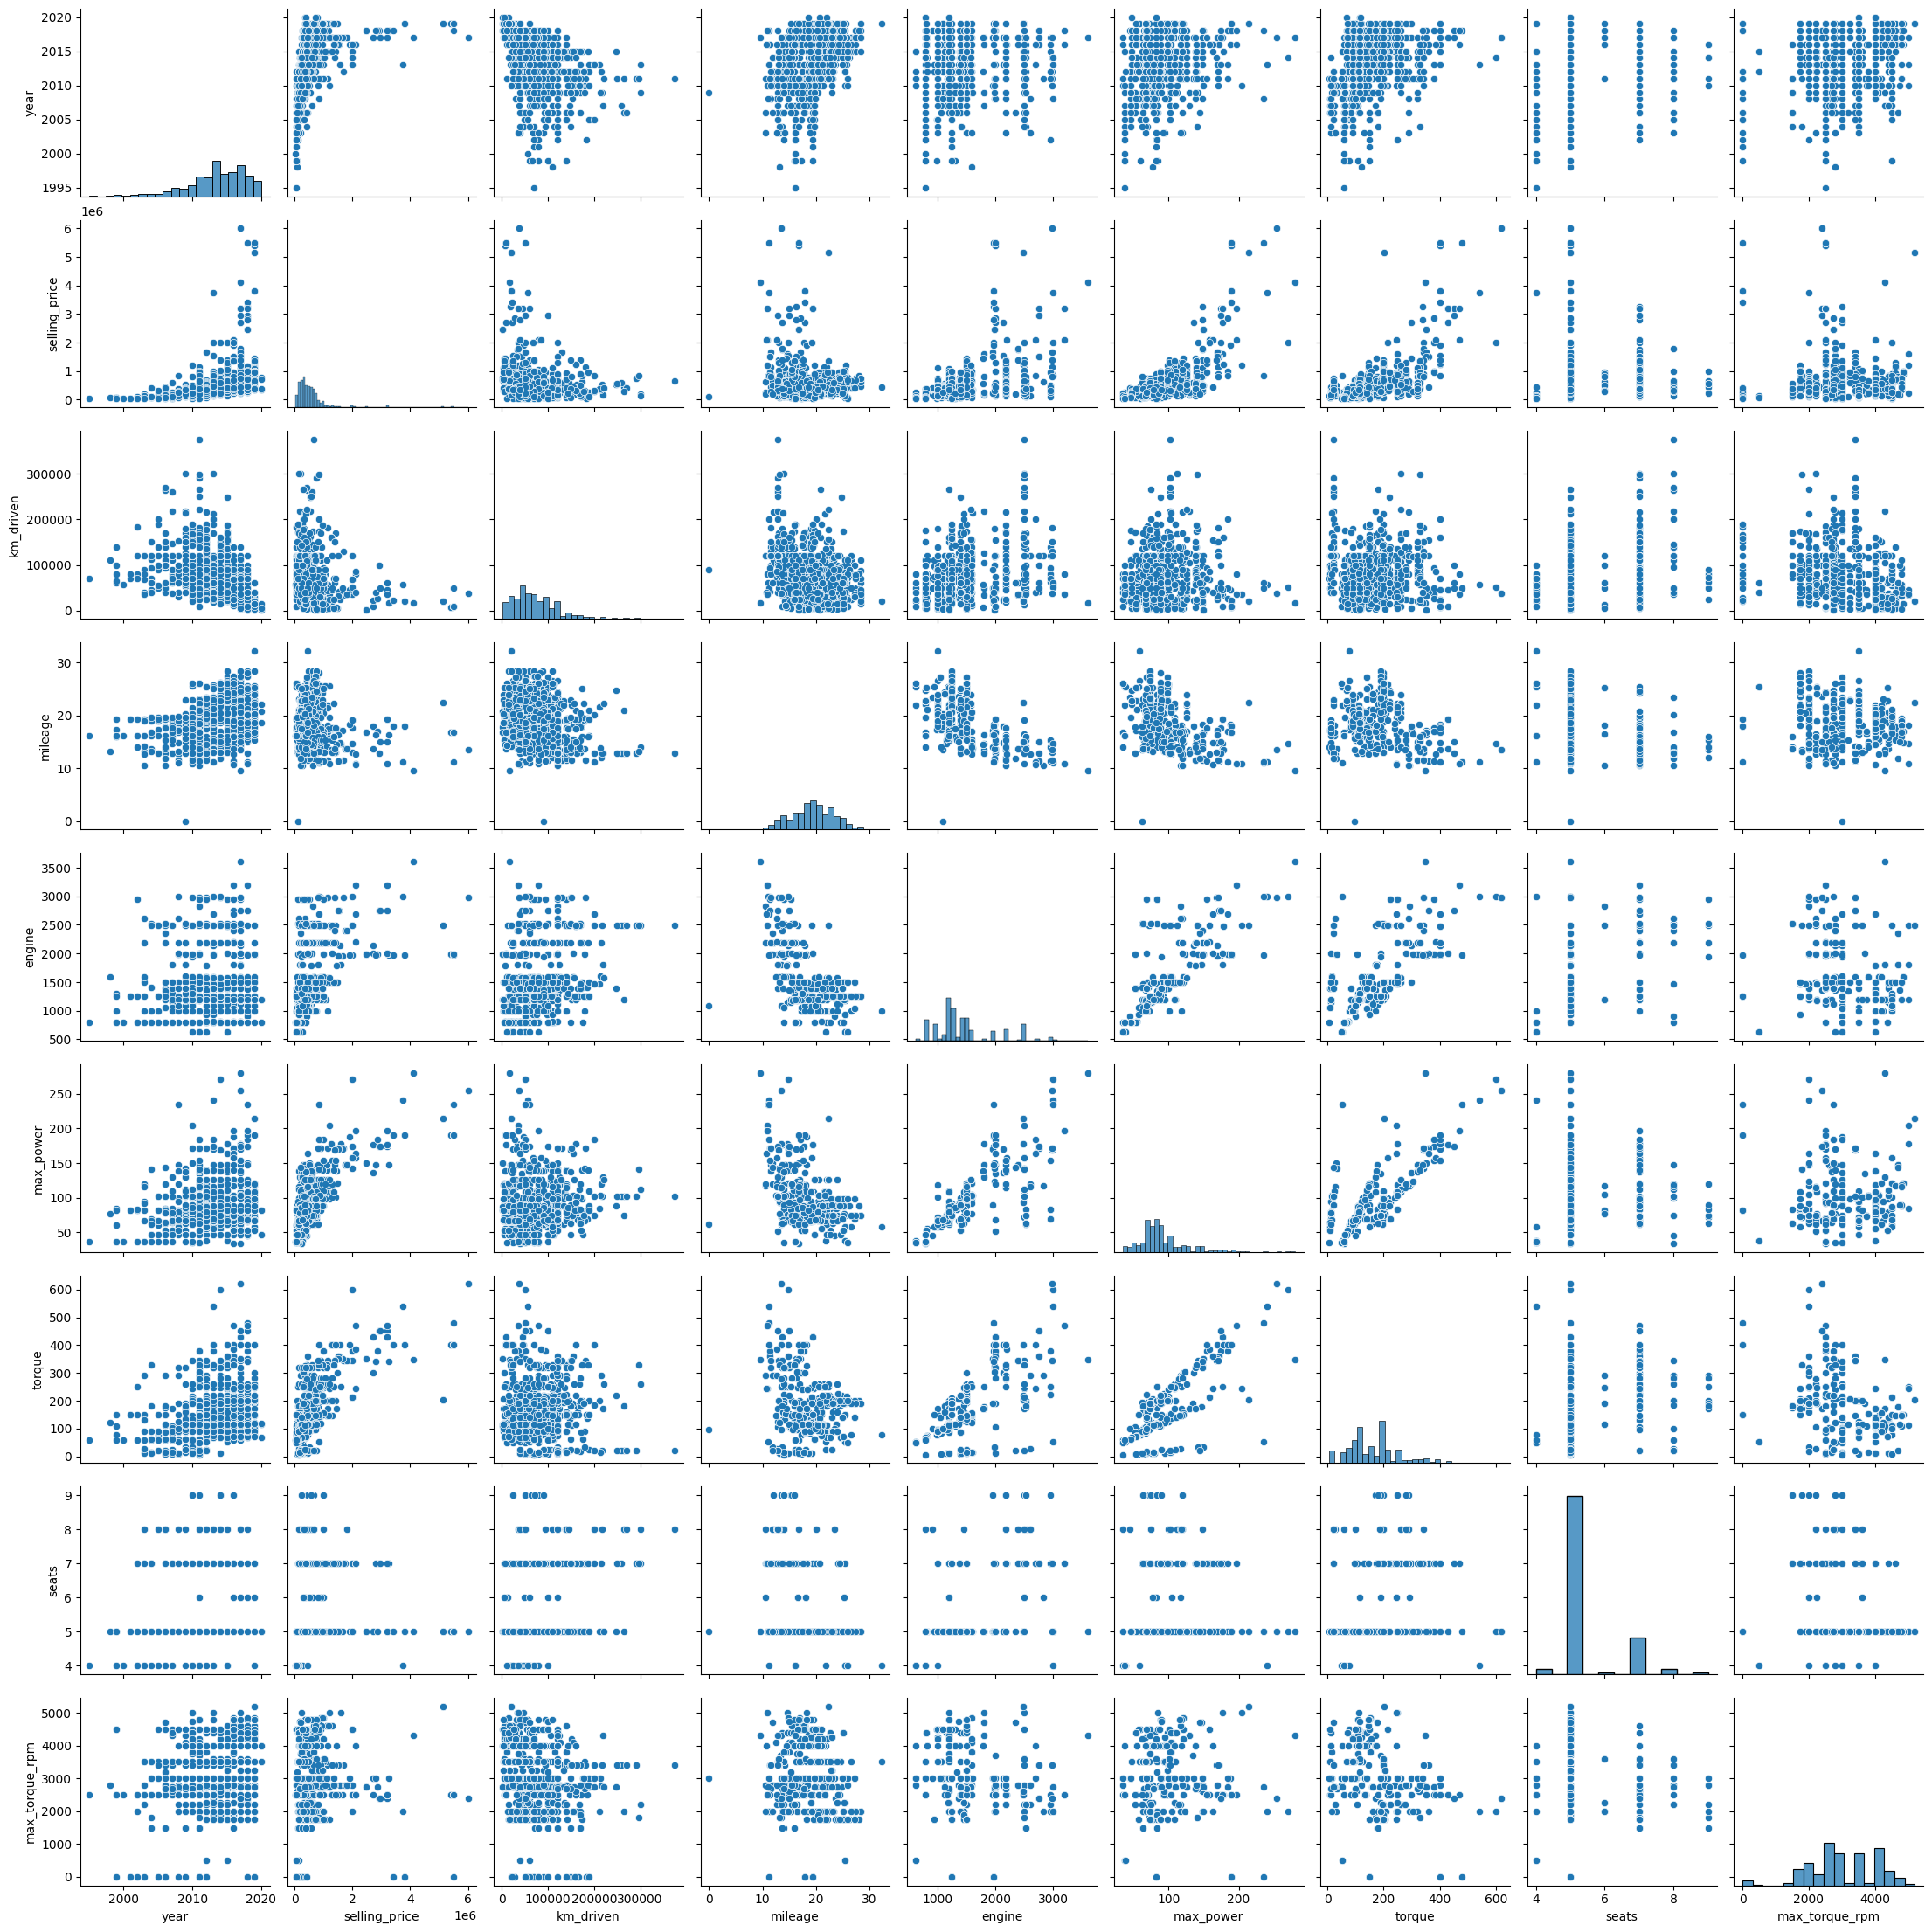

In [1165]:
sns.pairplot(df_test.drop(columns=['name','fuel','seller_type','transmission', 'owner']))
plt.show()

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

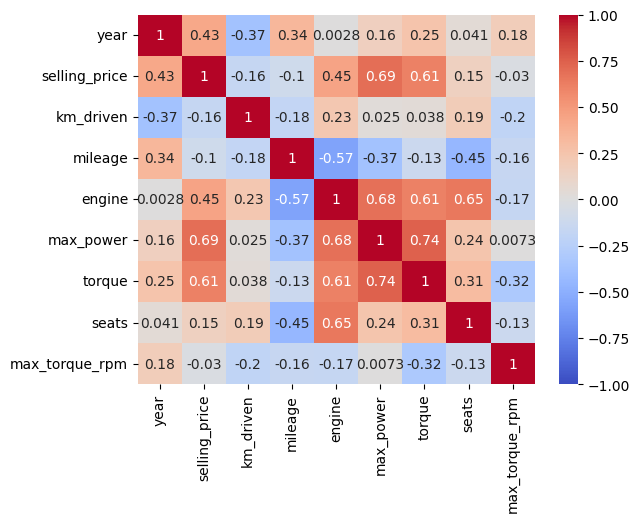

In [1166]:
sns.heatmap(df_train.drop(columns=['name','fuel','seller_type','transmission', 'owner']).corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()


Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

* > между годом выпуска и числом оборотов.
* > между ценой и мощностью, двигателем и мощностью, двигателем и количеством сидений
* > видна достаточно сильная отрицательная зависимость, так что да - можно утверждать 

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='year', ylabel='selling_price'>

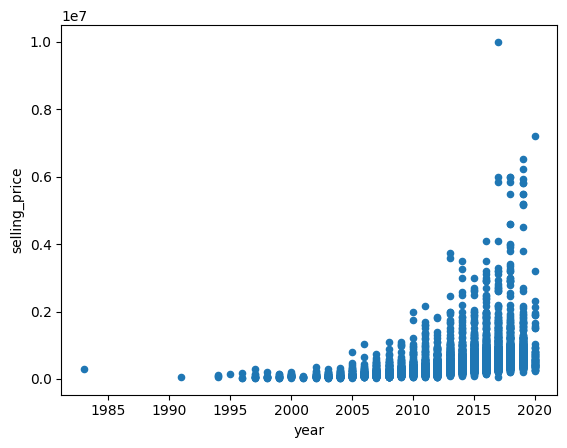

In [1167]:
df_train.plot.scatter(x='year',y='selling_price')


### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

* Также добавим графики наиболее сильно положительно и отрицательно связанных величин 

<Axes: xlabel='engine', ylabel='seats'>

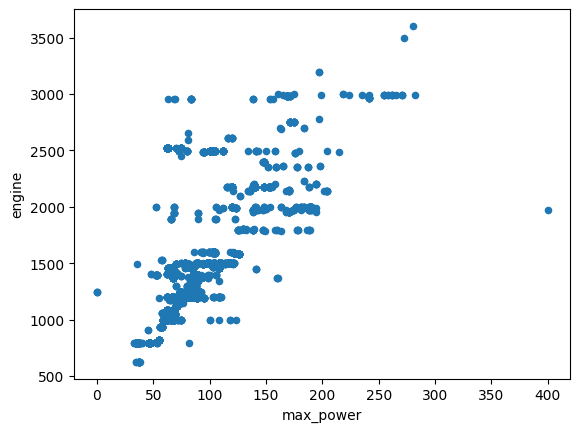

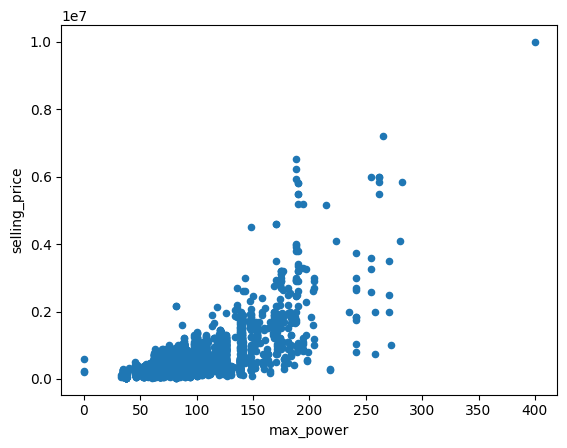

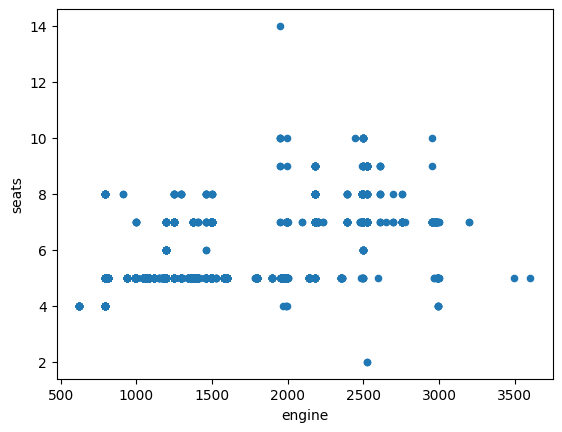

In [1168]:
df_train.plot.scatter(x='max_power',y='engine')
df_train.plot.scatter(x='max_power',y='selling_price')
df_train.plot.scatter(x='engine',y='seats')


<Axes: xlabel='year', ylabel='mileage'>

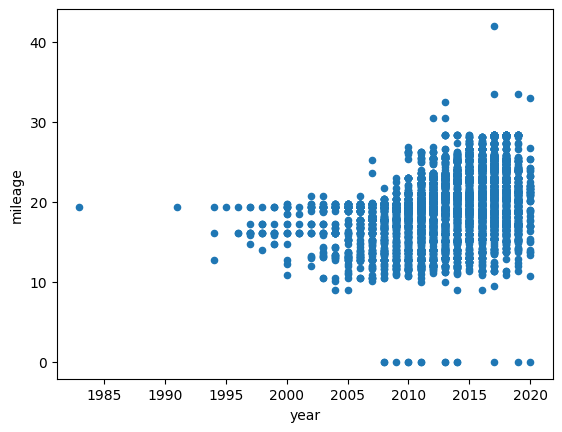

In [1169]:
df_train.plot.scatter(x='year',y='mileage')


# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [1170]:
y_train = df_train['selling_price']
X_train = df_train.drop(columns=['name','fuel','seller_type','transmission', 'owner','selling_price'])
X_train

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014,145500,23.40,1248,74.00,190.00,5,2000.0
1,2014,120000,21.14,1498,103.52,250.00,5,2500.0
2,2010,127000,23.00,1396,90.00,22.40,5,2750.0
3,2007,120000,16.10,1298,88.20,11.50,5,4500.0
4,2017,45000,20.14,1197,81.86,113.75,5,4000.0
...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,96.10,5,3000.0
5836,2013,50000,18.90,998,67.10,90.00,5,3500.0
5837,2013,110000,18.50,1197,82.85,113.70,5,4000.0
5838,2007,119000,16.80,1493,110.00,24.00,5,2750.0


In [1171]:
assert X_train.shape == (5840, 8)

In [1172]:
y_test = df_test['selling_price']
X_test = df_test.drop(columns=['name','fuel','seller_type','transmission', 'owner','selling_price'])

In [1173]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [1174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_pred= model_lr.predict(X_train)
test_pred = model_lr.predict(X_test)

In [1175]:
def show_MSE_r2(tn_pred, tt_pred):
    print(f'train MSE: {MSE(y_train,tn_pred)}')
    print(f'train r2: {r2_score(y_train,tn_pred)}')
    print('--------------------------------------')
    print(f'test MSE: {MSE(y_test,tt_pred)}')
    print(f'test r2: {r2_score(y_test,tt_pred)}')
    print('--------------------------------------')


In [1176]:
show_MSE_r2(train_pred, test_pred)

train MSE: 113868718448.75616
train r2: 0.6027442836115535
--------------------------------------
test MSE: 227369157721.49426
test r2: 0.6044574412818404
--------------------------------------


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [1177]:
from sklearn.preprocessing import StandardScaler

data_columns=list(X_train.columns)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

model_sc = LinearRegression()
model_sc.fit(X_train_std, y_train)

train_pred_std = model_sc.predict(X_train_std)
test_pred_std = model_sc.predict(X_test_std)

In [1178]:
show_MSE_r2(train_pred_std, test_pred_std)

train MSE: 113868718448.75621
train r2: 0.6027442836115533
--------------------------------------
test MSE: 227369157721.497
test r2: 0.6044574412818357
--------------------------------------


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

> MAX POWER

In [1179]:
pd.DataFrame(data=model_sc.coef_.reshape(1,8),columns=data_columns)

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,166766.277902,-46667.080388,-10012.808611,26507.359393,301183.723463,41668.641163,-31813.221803,-45904.968554


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [1187]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()

model_lasso.fit(X_train_std, y_train)

train_pred_lasso = model_lasso.predict(X_train_std)
test_pred_lasso = model_lasso.predict(X_test_std)

In [1188]:
show_MSE_r2(train_pred_lasso, test_pred_lasso)

train MSE: 113868718459.12111
train r2: 0.6027442835753931
--------------------------------------
test MSE: 227369931146.9195
test r2: 0.6044560957929679
--------------------------------------


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>
>  Значение параметра регуляризации (alpha) по умолчанию в sklearn не является нулевым, и поэтому некоторые веса могут быть затушеваны, но не полностью занулены. Это связано с тем, что L1-регуляризация стремится минимизировать сумму абсолютных значений весов и при достаточно большом значении alpha может сильно уменьшить их, но не до нуля.

In [1182]:
pd.DataFrame(data=model_lasso.coef_.reshape(1,8),columns=data_columns)


,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,166764.172005,-46666.325436,-10009.833886,26506.40109,301183.94788,41668.749511,-31810.123048,-45902.702378


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [1195]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(cv=10,
            estimator=model_lasso,
            param_grid={"alpha":np.arange(10000, 20000, 100)})

grid_search = grid_search.fit(X_train_std, y_train)

print("Лучшие параметры: ", grid_search.best_params_)
print("Лучший скор: ", grid_search.best_score_)

Лучшие параметры:  {'alpha': 19800}
Лучший скор:  0.5847029506802596


In [1199]:
grid_search_lasso = Lasso(alpha = 19800)
grid_search_lasso.fit(X_train_std, y_train)


for col, val in zip(X_train.columns, grid_search_lasso.coef_):
    print(f'{col}: {val}')

year: 141888.76620003578
km_driven: -27780.942932212376
mileage: 0.0
engine: 0.0
max_power: 288941.44372861093
torque: 54669.606757823036
seats: -0.0
max_torque_rpm: -12499.057361653835


In [1126]:
grid_search.cv_results_


{'mean_fit_time': array([0.01375904, 0.01236541, 0.00915022, 0.01341   , 0.00897706,
        0.00865006, 0.00954354, 0.01087368, 0.01594584]),
 'std_fit_time': array([0.00577015, 0.0041446 , 0.00094357, 0.00531638, 0.00197391,
        0.0014629 , 0.00391553, 0.00566377, 0.01142064]),
 'mean_score_time': array([0.00311754, 0.00332353, 0.00296926, 0.00459223, 0.00300696,
        0.00268438, 0.00351951, 0.00293264, 0.00294304]),
 'std_score_time': array([0.00016469, 0.00108379, 0.00056366, 0.00196277, 0.00101892,
        0.00021824, 0.00225492, 0.00036191, 0.00014517]),
 'param_alpha': masked_array(data=[0.1, 0.1, 0.1, 1.0, 1.0, 1.0, 10.0, 10.0, 10.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_tol': masked_array(data=[0.01, 0.001, 0.0001, 0.01, 0.001, 0.0001, 0.01, 0.001,
                    0.0001],
              mask=[False, False, False, False, False, False, False, 

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>
> 1000

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>
* > 19800
* > При текущем параметере занулились: mileage, engine, seats

In [1200]:
train_pred_grid_search_lasso = grid_search_lasso.predict(X_train_std)
test_pred_grid_search_lasso = grid_search_lasso.predict(X_test_std)

show_MSE_r2(train_pred_grid_search_lasso, test_pred_grid_search_lasso)

train MSE: 115998386638.85638
train r2: 0.5953144743184184
--------------------------------------
test MSE: 242826722391.03845
test r2: 0.5775667022642286
--------------------------------------


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [1201]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()

grid_search_elastic = GridSearchCV(cv=10,
            estimator=ElasticNet(),
            param_grid={'alpha':np.arange(0.1, 1, 0.01), 'l1_ratio':np.arange(0.1, 1, 0.01)},
            scoring='neg_mean_absolute_error', verbose=0)

grid_search_elastic_train = grid_search_elastic.fit(X_train_std, y_train)

print(grid_search_elastic_train.score(X_train_std, y_train))   


-167606.2373154594


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [1203]:
grid_search_elastic_train.best_params_

NameError: name 'grid_search_elastic_train' is not defined

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [ ]:
X_train_cat = df_train.copy()
X_test_cat = df_test.copy()
X_train_cat = X_train_cat.drop(['selling_price','name'], axis=1)
X_test_cat = X_test_cat.drop(['selling_price','name'], axis=1)

In [ ]:
assert X_train_cat.shape == (5840, 12)

In [ ]:
X_train_cat.describe(include='object')

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here

business_metrics(# your code here)

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link